# Project 1
## Name: Rohit Patil
### Course: DSC680 - Applied Data Science
### Milestone 2: EDA and Model Building
### Due Date: 28/09/2025

***

## Used Car Price Prediction and Market Analysis for the Indian Market

### Business Problem

For online marketplaces such as Cars24, accurate pricing of used cars is essential to remain profitable, turn over inventory quickly, and build trust with buyers and sellers. Pricing cars above the market price, referred to as the as-is price, could lead to vehicles sitting in inventory for long periods, while pricing cars below the market price may result in revenue losses. This project addresses this business issue by creating a data-driven pricing model to estimate a used car's market price (known as the as-is price) based on specific attributes.

### Dataset for analysis
https://www.kaggle.com/datasets/amanrajput16/used-car-price-data-from-cars24 

### Data Attributes

This dataset contains scraped data from Cars24, a popular online marketplace for buying and selling used cars. It provides detailed information on various pre-owned car listings, including:

- Model Name and Manufacturing Year
- Price and KM Driven (mileage)
- Engine Capacity and Fuel Type
- Transmission Type (Manual/Automatic)
- Ownership History (First-hand, Second-hand, etc.)
- Availability of Spare Key
- Imperfections and Repainted Parts

In [5]:
# Import required library/dependency
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

### Step 1: Load the data and validate the data and column information

In [7]:
# Load Data
cars24_df = pd.read_csv('cars24data.csv')

In [8]:
# Validate if datasets are loaded properly
cars24_df.head()

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,2017 Maruti Swift VXI,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,2016 Maruti Baleno DELTA PETROL 1.2,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1
2,2020 Maruti Swift VXI,577000,2020,1197,No,Manual,47110,1,Petrol,4,2
3,2022 Maruti Ertiga VXI AT SHVS,1084000,2022,1462,Yes,Automatic,35378,1,Petrol,2,3
4,2019 Maruti Dzire VXI,603000,2019,1197,Yes,Manual,91856,1,Petrol,3,2


In [9]:
# Data information for the dataset loaded and has all column info
cars24_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Model Name          1445 non-null   object
 1   Price               1445 non-null   int64 
 2   Manufacturing_year  1445 non-null   int64 
 3   Engine capacity     1445 non-null   int64 
 4   Spare key           1445 non-null   object
 5   Transmission        1445 non-null   object
 6   KM driven           1445 non-null   int64 
 7   Ownership           1445 non-null   int64 
 8   Fuel type           1445 non-null   object
 9   Imperfections       1445 non-null   int64 
 10  Repainted Parts     1445 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 124.3+ KB


### Step 2: Data Preparation for Modeling

#### 2.1. Feature Engineering: Create 'Car_Age'

In [12]:
current_year = pd.to_datetime('today').year
cars24_df['Car_Age'] = current_year - cars24_df['Manufacturing_year']

# Validate feature engineered 
cars24_df.head()

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts,Car_Age
0,2017 Maruti Swift VXI,561000,2017,1197,No,Manual,25847,2,Petrol,6,2,8
1,2016 Maruti Baleno DELTA PETROL 1.2,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1,9
2,2020 Maruti Swift VXI,577000,2020,1197,No,Manual,47110,1,Petrol,4,2,5
3,2022 Maruti Ertiga VXI AT SHVS,1084000,2022,1462,Yes,Automatic,35378,1,Petrol,2,3,3
4,2019 Maruti Dzire VXI,603000,2019,1197,Yes,Manual,91856,1,Petrol,3,2,6


#### 2.2 Extract Brand from Model Name

In [14]:
cars24_df['Brand'] = cars24_df['Model Name'].apply(lambda x: x.split(' ')[1])

#### 2.3 Select features for the model

In [16]:
# For now, we will exclude 'Model Name' as it has too many unique values.
# We will also drop the original 'Manufacturing_year' as we have 'Car_Age'.
features = cars24_df.drop(['Model Name', 'Price', 'Manufacturing_year'], axis=1)
target = cars24_df['Price']

#### 2.3 One-Hot Encode categorical features

In [18]:
categorical_cols = ['Spare key', 'Transmission', 'Fuel type', 'Brand']
features_encoded = pd.get_dummies(features, columns=categorical_cols, drop_first=True)

# Features after One-Hot Encoding
features_encoded.head()

,Engine capacity,KM driven,Ownership,Imperfections,Repainted Parts,Car_Age,Spare key_Yes,Transmission_Manual,Fuel type_Diesel,Fuel type_Petrol
0,1197,25847,2,6,2,8,False,True,False,True
1,1197,55511,2,12,1,9,True,True,False,True
2,1197,47110,1,4,2,5,False,True,False,True
3,1462,35378,1,2,3,3,True,False,False,True
4,1197,91856,1,3,2,6,True,True,False,True


In [19]:
# Shape of encoded features
features_encoded.shape

(1445, 10)

#### 2.4 Split the data into training and testing sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    features_encoded,
    target,
    test_size=0.2,
    random_state=42
)

In [22]:
# Data Splitting 
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 1156
Testing set size: 289


### Step 3: Exploratory Data Analysis

#### 3.1 Summary statistics for numerical columns

In [25]:
cars24_df.describe()

,Price,Manufacturing_year,Engine capacity,KM driven,Ownership,Imperfections,Repainted Parts,Car_Age
count,1.445000e+03,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,5.263543e+05,2017.817301,1142.104498,50588.903114,1.285121,9.597232,3.228374,7.182699
std,1.963696e+05,2.986554,169.020818,27339.562631,0.489877,8.398637,3.364578,2.986554
min,1.390000e+05,2010.000000,796.000000,1207.000000,1.000000,0.000000,0.000000,2.000000
25%,3.900000e+05,2016.000000,998.000000,28803.000000,1.000000,3.000000,0.000000,5.000000
50%,5.010000e+05,2018.000000,1197.000000,47849.000000,1.000000,8.000000,2.000000,7.000000
75%,6.310000e+05,2020.000000,1197.000000,70337.000000,2.000000,14.000000,5.000000,9.000000
max,1.599000e+06,2023.000000,1462.000000,124716.000000,3.000000,43.000000,27.000000,15.000000


#### 3.2 Value counts for categorical columns

In [27]:
categorical_cols = ['Spare key', 'Transmission', 'Fuel type', 'Ownership']
for col in categorical_cols:
    print(f"\n-- {col} --")
    print(cars24_df[col].value_counts())


-- Spare key --
Spare key
Yes    908
No     537
Name: count, dtype: int64

-- Transmission --
Transmission
Manual       1073
Automatic     372
Name: count, dtype: int64

-- Fuel type --
Fuel type
Petrol    1264
CNG        109
Diesel      72
Name: count, dtype: int64

-- Ownership --
Ownership
1    1059
2     360
3      26
Name: count, dtype: int64


#### 3.3 Price vs. Car Age, Colored by Brand

**Why it's chosen:** 
This visual helps answer our questions about the relationship between a car's age and resale value and whether the depreciation rate is consistent across car brands.   

**What it does:** 
This is a scatter plot (where each point is a car). The x-axis represents the car's age, the y-axis represents its sale price, and each data point is colored according to the brand of the vehicle. 

**How it helps with analysis:** 
This practical visualization depicts the overall depreciation trend (price goes down with age) and uses colors to denote the brand, helping you see if brands depreciate quickly or slowly. 

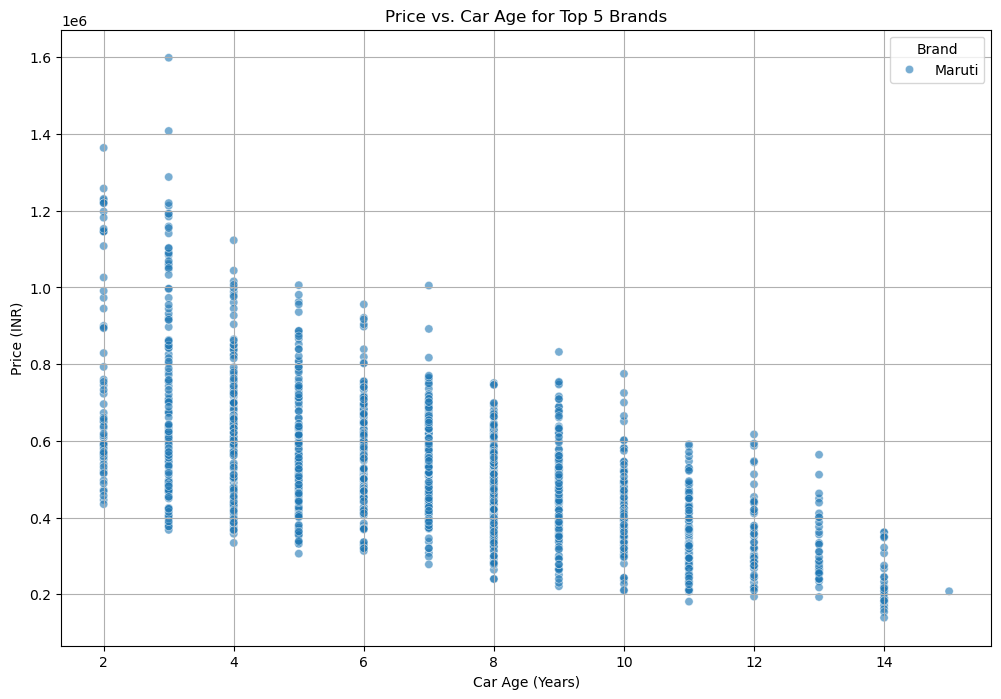

In [29]:
top_brands = cars24_df['Brand'].value_counts().nlargest(5).index
plt.figure(figsize=(12, 8))
sns.scatterplot(data=cars24_df[cars24_df['Brand'].isin(top_brands)], x='Car_Age', y='Price', hue='Brand', alpha=0.6)
plt.title('Price vs. Car Age for Top 5 Brands')
plt.xlabel('Car Age (Years)')
plt.ylabel('Price (INR)')
plt.grid(True)

#### 3.4 Price vs. Kilometers Driven, Colored by Fuel Type

**Why it's chosen:** 
The scatter plot is created to address better the impact of kilometers driven on a car's pricing and whether anything about that varies based on fuel types. 

**What it does:** 
This is a scatter plot, so the x-axis indicates the kilometers driven while the y-axis indicates the price. The color at each point indicates the car's fuel type (Petrol, Diesel, CNG). 

**How it helps your analysis:** 
The plot allows you to visualize the relationship between mileage and price, and whether that relationship is consistent across the three fuel types. For instance, diesel cars hold their value better at higher mileages.

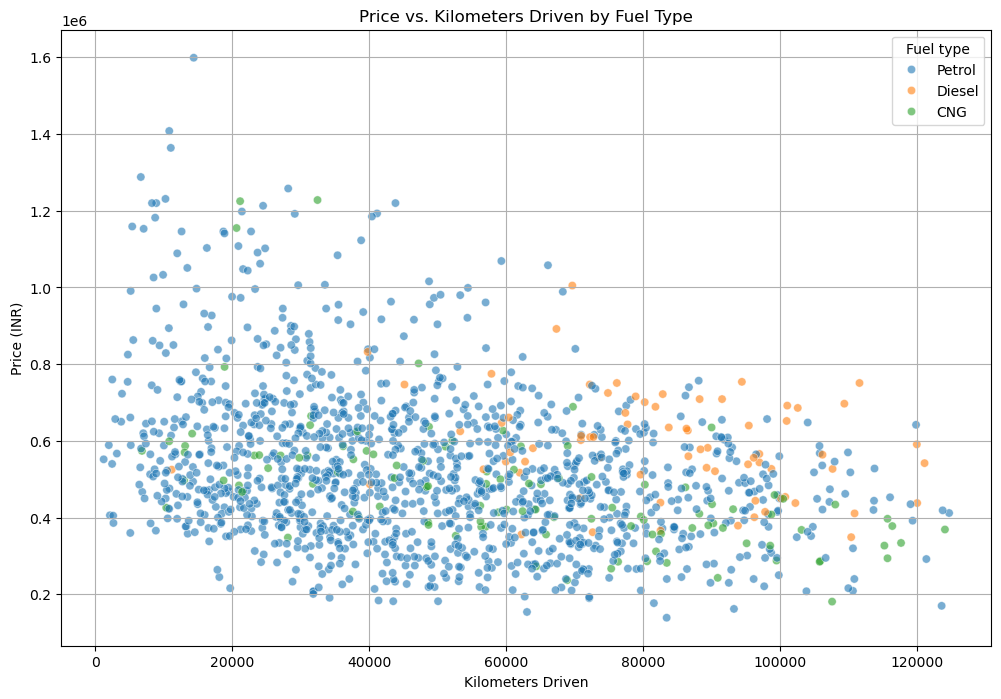

In [31]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=cars24_df, x='KM driven', y='Price', hue='Fuel type', alpha=0.6)
plt.title('Price vs. Kilometers Driven by Fuel Type')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (INR)')
plt.grid(True)

#### 3.5 Price Distribution by Transmission Type

**Why it was chosen:** 
This figure answers our inquiry about the average price difference of a manual vs. an automatic transmission car in a straightforward way.

**What it shows:** 
This is a box plot that depicts the distribution of prices for manual transmission (left) and automatic transmission (right) cars, placed side by side.

**How it helps your analysis:** This enables a simple visual comparison of the range in automatic vs. manual car price distribution, indicating median prices, data spreads, and outliers or possible extreme observations. This figure shows that automatic transmission results in typical price premiums.

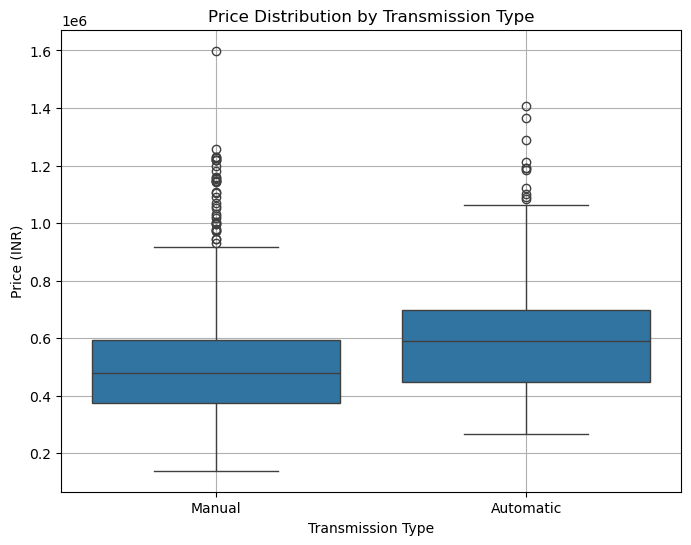

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=cars24_df, x='Transmission', y='Price')
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price (INR)')
plt.grid(True)

#### 3.6 Price Distribution by Number of Owners

**Why it's chosen:** 
This plot directly answers our question about the relationship between the number of previous owners and car value. 

**What it does:** 
This box plot shows the price distributions of cars with varying numbers of previous owners (e.g., 1st owner, 2nd owner, etc.). 

**How it helps your analysis:** 
It can enable you to quickly identify if there is a substantial decline in price as the number of previous owners increases, so that you can measure the effect of ownership history on the value of the vehicle.

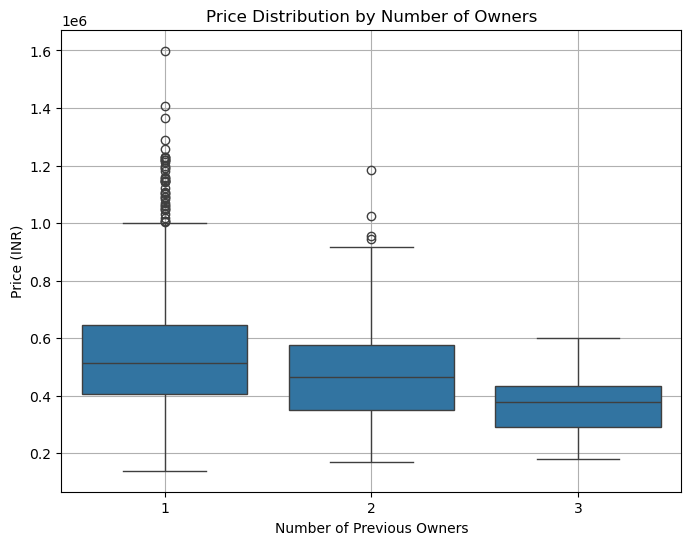

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=cars24_df, x='Ownership', y='Price')
plt.title('Price Distribution by Number of Owners')
plt.xlabel('Number of Previous Owners')
plt.ylabel('Price (INR)')
plt.grid(True)

### Step 4: Model Training and Evaluation

#### 4.1 Linear Regression

In [38]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

print(f"Mean Absolute Error (MAE): {lr_mae:.2f}")
print(f"R-squared (R²): {lr_r2:.2f}")

Mean Absolute Error (MAE): 61176.58
R-squared (R²): 0.80


#### 4.2 Random Forest Regression 

In [40]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"R-squared (R²): {rf_r2:.2f}")

Mean Absolute Error (MAE): 54434.78
R-squared (R²): 0.83


### Step 5: Model Interpretation - Feature Importance

In [42]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = features_encoded.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\n--- Top 5 Most Important Features ---")
print(feature_importance_df.head())


--- Top 5 Most Important Features ---
           Feature  Importance
0  Engine capacity    0.634064
5          Car_Age    0.231381
1        KM driven    0.055065
3    Imperfections    0.028636
4  Repainted Parts    0.020295


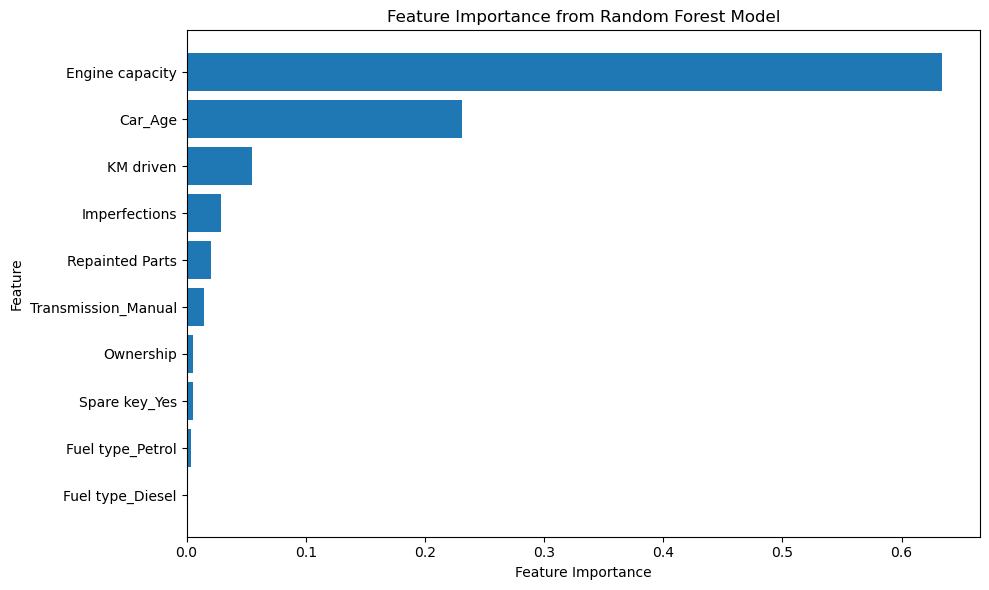

In [43]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Random Forest Model")
plt.gca().invert_yaxis()
plt.tight_layout()